# **STATISTICAL FOUNDATION FOR MACHINE LEARNING**

Why Statistics Before Machine Learning?
Machine Learning is applied statistics at scale.

**Key statistical foundations:**

• Hypothesis testing for decision-making

• Regression for prediction and inference

• p-values and confidence intervals for uncertainty

**Healthcare relevance in Kenya:**

• Logistic regression for hypertension risk prediction

• Survival analysis for HIV treatment outcomes

• Statistics ensures transparent and responsible AI

Key message:
Machine learning without statistics becomes a black box.
Why Statistics Before Machine Learning?
Machine Learning is applied statistics at scale.

**Key statistical foundations:**

• Hypothesis testing for decision-making

• Regression for prediction and inference

• p-values and confidence intervals for uncertainty

**Healthcare relevance in Kenya:**

• Logistic regression for hypertension risk prediction

• Survival analysis for HIV treatment outcomes

• Statistics ensures transparent and responsible AI

Key message:
Machine learning without statistics becomes a black box.


### **Load the Reequired Libraries**

In [1]:
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### **Read the Data to Colab Environment**

In [ ]:
uploaded = files.upload()

Saving htn_dat.csv to htn_dat.csv


### **Read the Data as Data Frame into Colab Environment**

In [ ]:
df = pd.read_csv('htn_dat.csv')
df.head()

,ID,DBP,SBP,BMI,age,married,male.gender,hgb_centered,adv_HIV,survtime,event,arv_naive,urban.clinic,log_creat_centered,IPW_weight,SBP_ge120
0,16097,60,90,NaN,28.000000,0.0,0,NaN,NaN,338,1,1,0,NaN,0.924379,0
1,930,75,110,27.339912,26.458590,1.0,0,-3.9,0.0,439,1,1,1,5.421770e-02,1.163862,0
2,6877,60,80,17.689789,42.951405,0.0,0,-3.2,NaN,752,1,1,0,-3.597409e-01,0.721148,0
3,36464,60,90,19.854080,50.149212,1.0,1,NaN,NaN,526,1,1,1,NaN,0.829452,0
4,36180,60,100,21.295294,30.554415,0.0,1,-0.4,NaN,215,1,1,0,-1.000000e-07,0.856046,0


### **Visualize the Table of Variables and their Definitions**

In [ ]:
import pandas as pd
from IPython.display import display, HTML

# Create variable dictionary
variables_dict = pd.DataFrame({
    'Variable': [
        'ID', 'DBP', 'SBP', 'BMI', 'age', 'married', 'male.gender',
        'hgb_centered', 'adv_HIV', 'survtime', 'event', 'arv_naive',
        'urban.clinic', 'log_creat_centered', 'IPW_weight', 'SBP_ge120'
    ],
    'Type': [
        'Integer', 'Integer', 'Integer', 'Float', 'Float', 'Binary', 'Binary',
        'Float', 'Binary', 'Integer', 'Binary', 'Binary',
        'Binary', 'Float', 'Float', 'Binary'
    ],
    'Description': [
        'Unique patient identifier',
        'Diastolic blood pressure',
        'Systolic blood pressure',
        'Body Mass Index',
        'Patient age in years',
        'Marital status',
        'Gender indicator',
        'Hemoglobin (centered around mean)',
        'Advanced HIV disease status',
        'Survival time in days',
        'Event indicator (hypertension onset)',
        'Antiretroviral therapy naive status',
        'Clinic location',
        'Log-transformed creatinine (centered)',
        'Inverse probability weighting weight',
        'Hypertension indicator (SBP ≥ 120 mmHg)'
    ],
    'Values / Units': [
        'Unique ID',
        'mmHg',
        'mmHg',
        'kg/m²',
        'Years',
        '1 = Married, 0 = Not married',
        '1 = Male, 0 = Female',
        'g/dL (mean-centered)',
        '1 = Yes, 0 = No, NA = Missing',
        'Days',
        '1 = Event occurred, 0 = Censored',
        '1 = Naive, 0 = Experienced',
        '1 = Urban, 0 = Rural',
        'log(mg/dL) (centered)',
        'Continuous weight',
        '1 = Hypertensive, 0 = Normotensive'
    ],
    'Notes': [
        'The-identified patient ID',
        'Normal range: 60–80 mmHg',
        'Primary outcome variable',
        'Missing values present (NA)',
        'Range: 16–80 years',
        'Self-reported status',
        'Biological sex assigned at birth',
        'Centered = raw value minus cohort mean',
        'CD4 <200 cells/μL or WHO Stage 3/4',
        'Time to hypertension diagnosis or censoring',
        'Primary outcome for survival analysis',
        'Never received ARVs before enrollment',
        'Based on clinic administrative location',
        'Centered for modeling stability',
        'For causal inference adjustment',
        'Clinical threshold per WHO guidelines'
    ]
})

# Display as styled table
display(HTML(
    variables_dict.to_html(
        index=False,
        classes='table table-striped',
        escape=False
    ).replace(
        '<table border="1" class="dataframe table table-striped">',
        '<table class="table table-hover" style="width:100%; border-collapse:collapse; font-family:Arial, sans-serif;">'
    ).replace(
        '<th>',
        '<th style="background-color:#2c3e50; color:white; padding:12px; text-align:left; font-weight:bold;">'
    ).replace(
        '<td>',
        '<td style="padding:10px; border-bottom:1px solid #ddd;">'
    ).replace(
        '<tr>',
        '<tr style="border-top:2px solid #2c3e50;">'
    )
))

Variable,Type,Description,Values / Units,Notes
ID,Integer,Unique patient identifier,Unique ID,The-identified patient ID
DBP,Integer,Diastolic blood pressure,mmHg,Normal range: 60–80 mmHg
SBP,Integer,Systolic blood pressure,mmHg,Primary outcome variable
BMI,Float,Body Mass Index,kg/m²,Missing values present (NA)
age,Float,Patient age in years,Years,Range: 16–80 years
married,Binary,Marital status,"1 = Married, 0 = Not married",Self-reported status
male.gender,Binary,Gender indicator,"1 = Male, 0 = Female",Biological sex assigned at birth
hgb_centered,Float,Hemoglobin (centered around mean),g/dL (mean-centered),Centered = raw value minus cohort mean
adv_HIV,Binary,Advanced HIV disease status,"1 = Yes, 0 = No, NA = Missing",CD4 <200 cells/μL or WHO Stage 3/4
survtime,Integer,Survival time in days,Days,Time to hypertension diagnosis or censoring


## **Data Cleaning and Preprocessing**

In [ ]:
### Check the Structure of the Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  4999 non-null   int64  
 1   DBP                 4999 non-null   int64  
 2   SBP                 4999 non-null   int64  
 3   BMI                 4329 non-null   float64
 4   age                 4999 non-null   float64
 5   married             4835 non-null   float64
 6   male.gender         4999 non-null   int64  
 7   hgb_centered        3605 non-null   float64
 8   adv_HIV             3038 non-null   float64
 9   survtime            4999 non-null   int64  
 10  event               4999 non-null   int64  
 11  arv_naive           4999 non-null   int64  
 12  urban.clinic        4999 non-null   int64  
 13  log_creat_centered  3461 non-null   float64
 14  IPW_weight          4999 non-null   float64
 15  SBP_ge120           4999 non-null   int64  
dtypes: flo

### **Check the Number of Missing Variables for Each Variable**

In [ ]:
df.isnull().sum()

,0
ID,0
DBP,0
SBP,0
BMI,670
age,0
married,164
male.gender,0
hgb_centered,1394
adv_HIV,1961
survtime,0


### **Delete All Rows with Missing Values**

In [ ]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2326 entries, 1 to 4998
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  2326 non-null   int64  
 1   DBP                 2326 non-null   int64  
 2   SBP                 2326 non-null   int64  
 3   BMI                 2326 non-null   float64
 4   age                 2326 non-null   float64
 5   married             2326 non-null   float64
 6   male.gender         2326 non-null   int64  
 7   hgb_centered        2326 non-null   float64
 8   adv_HIV             2326 non-null   float64
 9   survtime            2326 non-null   int64  
 10  event               2326 non-null   int64  
 11  arv_naive           2326 non-null   int64  
 12  urban.clinic        2326 non-null   int64  
 13  log_creat_centered  2326 non-null   float64
 14  IPW_weight          2326 non-null   float64
 15  SBP_ge120           2326 non-null   int64  
dtypes: float64(

In [ ]:
df.isnull().sum()

,0
ID,0
DBP,0
SBP,0
BMI,0
age,0
married,0
male.gender,0
hgb_centered,0
adv_HIV,0
survtime,0


### **Data Visualization**

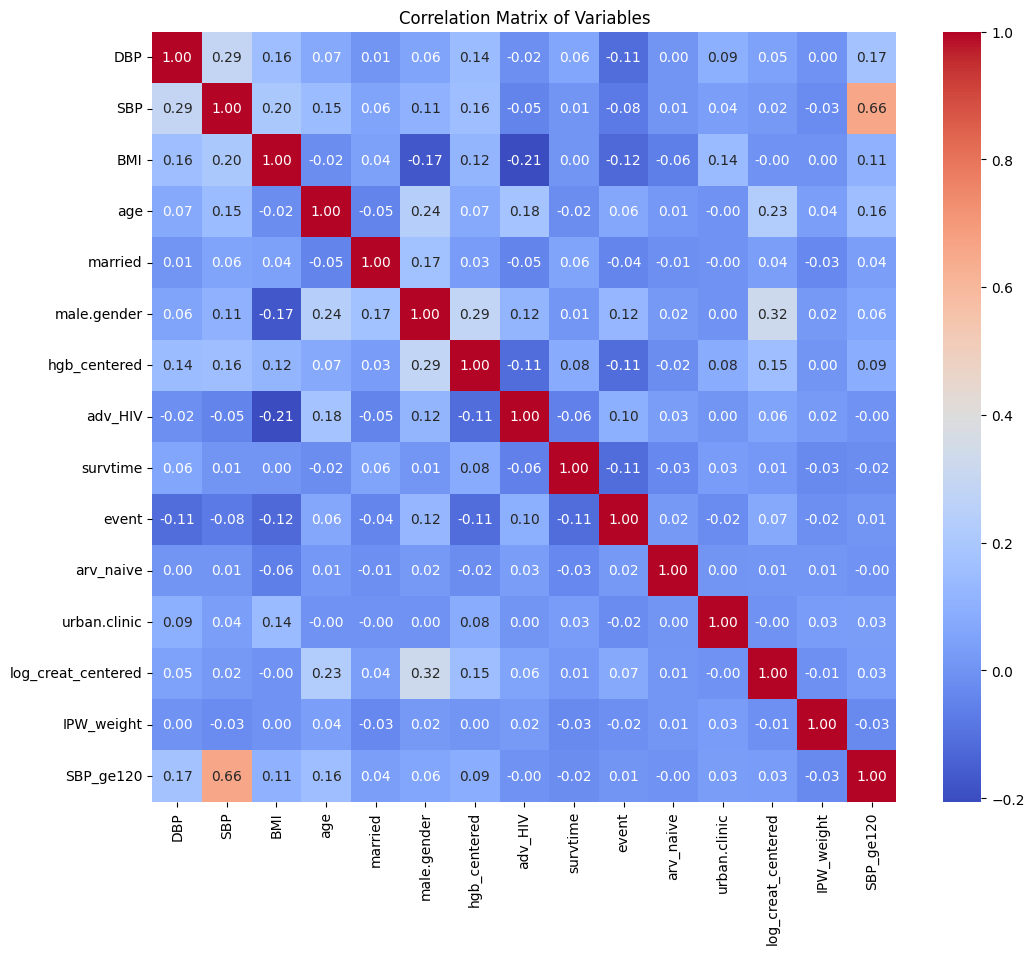

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.drop('ID', axis=1).corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Variables')
plt.show()

## **REGRESSION ANALYSIS**

### **Simple Linear Regression Model**

### **State the Null and Alternative Hypothesis**

Null hypothesis: Body Mass Index (BMI) has no statistically significant impact on Systolic Blood Pressure at 5% level of significance.

Alternative hypothesis: Body Mass Index (BMI) has a statistically significant impact on Systolic Blood Pressure at 5% level of significance.

### **Select a Few Variables for Mulptiple OLS**

In [ ]:
y = df['SBP']
X = df['BMI']

In [ ]:
y.head()

,SBP
1,110
11,120
12,127
17,110
22,100


In [ ]:
X.head()

,BMI
1,27.339912
11,23.068195
12,21.989893
17,20.983988
22,15.396691


### **Level of Significance**
This analysis is conducted at a 5% level of significance

### **Decide on the Test Statistics**
Since we are interested in the effect of BMI on SyBP, which are all continous, we will estimate a regression equation

### **Conduct the Test**

In [ ]:
import statsmodels.api as sm
X = sm.add_constant(X)
X.head()

,const,BMI
1,1.0,27.339912
11,1.0,23.068195
12,1.0,21.989893
17,1.0,20.983988
22,1.0,15.396691


In [ ]:
model = sm.OLS(y, X)
results = model.fit()

### **Print the Results**

In [ ]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    SBP   R-squared:                       0.041
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     100.2
Date:                Mon, 09 Feb 2026   Prob (F-statistic):           3.96e-23
Time:                        17:24:27   Log-Likelihood:                -9623.3
No. Observations:                2326   AIC:                         1.925e+04
Df Residuals:                    2324   BIC:                         1.926e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         92.8415      1.872     49.587      0.000      89.170      96.513
BMI            0.8572      0.086     10.012      0.000       0.689       1.025
==============================================================================
Omnibus:                      641.236   Durbin-Watson:                   2.060
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2483.156
Skew:                           1.306   Prob(JB):                         0.00
Kurtosis:                       7.336   Cond. No.                         131.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### **Multiple Linear Regression Model**
This is an extension of the simple linear regression model where predictors are added into the model to improve the performance and prediction accuracy.

### **Select a Few Variables for Mulptiple OLS**
Explicitly define the dependent variable (SBP) and select a few key independent variables for the OLS model based on clinical relevance and correlation with SBP.

In [ ]:
### Select the Predicted Variable
y = df['SBP']

### Select all the Required Predictor Variables
X = df[['DBP', 'age', 'BMI', 'male.gender', 'hgb_centered', 'log_creat_centered']]

In [ ]:
#### View the First Few Obervations of the Predicted Variable
y.head()

,SBP
1,110
11,120
12,127
17,110
22,100


In [ ]:
#### View the First Few Observations of the Predictor Variables
X.head()

,DBP,age,BMI,male.gender,hgb_centered,log_creat_centered
1,75,26.458590,27.339912,0,-3.90,0.054218
11,60,40.531143,23.068195,1,-3.93,0.223143
12,53,32.919918,21.989893,0,-1.30,-0.278203
17,70,36.596851,20.983988,1,1.10,0.013621
22,75,42.488705,15.396691,1,-0.80,0.068993


### **Add the Constant to the Data**
 Before performing OLS regression, it is standard practice to add a constant (intercept) term to the independent variables matrix X. This allows the model to estimate the intercept.

In [ ]:
#### Import the statsmodels.api as sm
import statsmodels.api as sm

#### Now add the Constant to the Dataset
X = sm.add_constant(X)

X.head()   #### View the Dataset with added constant

,const,DBP,age,BMI,male.gender,hgb_centered,log_creat_centered
1,1.0,75,26.458590,27.339912,0,-3.90,0.054218
11,1.0,60,40.531143,23.068195,1,-3.93,0.223143
12,1.0,53,32.919918,21.989893,0,-1.30,-0.278203
17,1.0,70,36.596851,20.983988,1,1.10,0.013621
22,1.0,75,42.488705,15.396691,1,-0.80,0.068993


Now that the dependent and independent variables are prepared, including the constant for the intercept, the next logical step is to perform the Ordinary Least Squares (OLS) regression using statsmodels and fit the model.

In [ ]:
### Initialize the Model Development Process
model = sm.OLS(y, X)

In [ ]:
#### Fit the OLS Model
model_results = model.fit()


In [ ]:
#### Get the Summary of the Fitted Model
model_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    SBP   R-squared:                       0.146
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     65.95
Date:                Mon, 09 Feb 2026   Prob (F-statistic):           6.76e-76
Time:                        17:26:38   Log-Likelihood:                -9489.1
No. Observations:                2326   AIC:                         1.899e+04
Df Residuals:                    2319   BIC:                         1.903e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 62.6884      2.734     22.926      0.000      57.326      68.050
DBP                    0.3744      0.030     12.444      0.000       0.315       0.433
age                    0.1711      0.029      5.845      0.000       0.114       0.228
BMI                    0.7386      0.085      8.740      0.000       0.573       0.904
male.gender            3.5317      0.797      4.429      0.000       1.968       5.095
hgb_centered           0.4275      0.119      3.606      0.000       0.195       0.660
log_creat_centered    -3.1331      1.034     -3.031      0.002      -5.160      -1.106
==============================================================================
Omnibus:                      610.617   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2419.433
Skew:                           1.233   Prob(JB):                         0.00
Kurtosis:                       7.346   Cond. No.                         743.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

SyBP = 62.6882 + 0.3744 (DBP) + 0.1711(Age) + 0.7386 (BMI) + 3.5317 (Gender) + 0.4275 (hgb_centered) - 3.1331(log_creat_centered)


SyBP = 62.6882 + 0.3744 (110) + 0.1711(26) + 0.7386 (23) + 3.5317 (1) + 0.4275 (1.24) - 3.1331(1.17) =

### **Interpretation of OLS Regression Results**

Based on the OLS Regression Results, we can draw the following interpretations:

*   **R-squared:** The R-squared value is 0.146, which means that approximately 14.6% of the variance in SBP (Systolic Blood Pressure) can be explained by the independent variables included in the model (DBP, age, BMI, male.gender, hgb_centered, and log_creat_centered). This indicates that while the model is statistically significant, a large portion of the variance in SBP is still unexplained by these variables.

*   **F-statistic and Prob (F-statistic):** The F-statistic is 65.95 with a very low p-value (6.76e-76), which is less than 0.05. This indicates that the overall regression model is statistically significant, meaning that at least one of the independent variables significantly predicts SBP.

*   **Coefficients and P-values:**
    *   **const (Intercept):** The intercept is 62.6884. This is the estimated SBP when all independent variables are zero.
    *   **DBP (Diastolic Blood Pressure):** The coefficient is 0.3744, with a p-value of 0.000. This suggests that for every one-unit increase in DBP, SBP is expected to increase by 0.3744 units, holding all other variables constant. This relationship is highly statistically significant.
    *   **age:** The coefficient is 0.1711, with a p-value of 0.000. For every one-year increase in age, SBP is expected to increase by 0.1711 units, holding other variables constant. This is also highly statistically significant.
    *   **BMI (Body Mass Index):** The coefficient is 0.7386, with a p-value of 0.000. A one-unit increase in BMI is associated with a 0.7386 unit increase in SBP, holding other variables constant. This is a strong and highly significant positive relationship.
    *   **male.gender:** The coefficient is 3.5317, with a p-value of 0.000. This indicates that, on average, males have an SBP that is 3.5317 units higher than females (assuming male.gender = 1 for males and 0 for females), holding other variables constant. This is a statistically significant difference.
    *   **hgb_centered (Hemoglobin centered):** The coefficient is 0.4275, with a p-value of 0.000. For every one-unit increase in centered hemoglobin, SBP is expected to increase by 0.4275 units, holding other variables constant. This relationship is statistically significant.
    *   **log_creat_centered (Log-transformed creatinine centered):** The coefficient is -3.1331, with a p-value of 0.002. This suggests that for every one-unit increase in centered log-creatinine, SBP is expected to decrease by 3.1331 units, holding other variables constant. This is a statistically significant inverse relationship.

*   **Omnibus and Jarque-Bera:** These tests check for normality of residuals. The low p-values (0.000 for both) suggest that the residuals are not normally distributed, which might indicate that the model's assumptions are violated or that there are uncaptured non-linear relationships or important omitted variables.

*   **Durbin-Watson:** The Durbin-Watson statistic is 2.052, which is close to 2. This suggests that there is little to no autocorrelation in the residuals, which is a good sign.

## **Summary:**
In this lab practice we define the dependent and independent variables, prepare the data, perform OLS regression, and interpret the results. The interpretation is as follows:
The OLS model indicates that approximately 14.6% of the variance in Systolic Blood Pressure (SBP) can be explained by Diastolic Blood Pressure (DBP), age, Body Mass Index (BMI), gender (male), centered hemoglobin (hgb\_centered), and centered log-transformed creatinine (log\_creat\_centered). The overall model is statistically significant (F-statistic = 65.95, p-value < 0.001). All selected independent variables are statistically significant predictors of SBP. However, diagnostic tests suggest that the residuals are not normally distributed, while there is no significant autocorrelation.

### **Data Analysis Key Findings**
*   The OLS model explained 14.6% of the variance in SBP (R-squared = 0.146), indicating that a substantial portion of SBP variability remains unexplained by the selected variables.
*   The overall regression model is highly statistically significant (F-statistic = 65.95, p-value = 6.76e-76), suggesting that at least one independent variable significantly predicts SBP.
*   All independent variables included in the model are statistically significant predictors of SBP (p-values < 0.05).
    *   DBP (coefficient = 0.3744), age (coefficient = 0.1711), BMI (coefficient = 0.7386), male.gender (coefficient = 3.5317), and hgb\_centered (coefficient = 0.4275) show a positive association with SBP.
    *   log\_creat\_centered (coefficient = -3.1331) shows a negative association with SBP.
*   The residuals of the model are not normally distributed (Omnibus and Jarque-Bera tests p-values = 0.000), which might indicate violations of OLS assumptions or uncaptured relationships.
*   There is little to no autocorrelation in the residuals (Durbin-Watson statistic = 2.052).

### **Insights or Next Steps**
*   Given the relatively low R-squared and non-normal residuals, further investigation into additional relevant variables or non-linear relationships with SBP could improve the model's explanatory power and fit.
*   Explore transformations of the dependent variable or independent variables, or consider alternative regression models (e.g., robust regression, generalized linear models) that do not assume normally distributed residuals to address the observed non-normality.


### **Additional Linear Regression Model**

In [2]:
### Initialize data importation
uploaded = files.upload()

Saving Unemployment.csv to Unemployment.csv


In [3]:
### Import the data as data frame
df = pd.read_csv('Unemployment.csv')
df.head()

,year,Unemployment,Inflation,FedRate
0,1859,5.133333,0.908472,3.933333
1,1860,5.233333,1.810777,3.696667
2,1861,5.533333,1.622720,2.936667
3,1862,6.266667,1.795335,2.296667
4,1863,6.800000,0.537033,2.003333


In [4]:
y = df['Unemployment']
X = df[['Inflation', 'FedRate']]

In [5]:
### Add Constant to the Independent Variables Matrix
import statsmodels.api as sm
X = sm.add_constant(X)
X.head()

,const,Inflation,FedRate
0,1.0,0.908472,3.933333
1,1.0,1.810777,3.696667
2,1.0,1.622720,2.936667
3,1.0,1.795335,2.296667
4,1.0,0.537033,2.003333


In [6]:
### Initialize Model Development Process
model = sm.OLS(y, X)

### Fit the Model
model_results = model.fit()

### Summary of the Fitted Model
model_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Unemployment   R-squared:                       0.084
Model:                            OLS   Adj. R-squared:                  0.073
Method:                 Least Squares   F-statistic:                     7.375
Date:                Tue, 10 Feb 2026   Prob (F-statistic):           0.000862
Time:                        03:34:16   Log-Likelihood:                -292.56
No. Observations:                 164   AIC:                             591.1
Df Residuals:                     161   BIC:                             600.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.0488      0.263     19.201      0.000       4.530       5.568
Inflation      0.0264      0.062      0.426      0.670      -0.096       0.149
FedRate        0.1227      0.048      2.542      0.012       0.027       0.218
==============================================================================
Omnibus:                        5.612   Durbin-Watson:                   0.081
Prob(Omnibus):                  0.060   Jarque-Bera (JB):                5.480
Skew:                           0.447   Prob(JB):                       0.0646
Kurtosis:                       3.041   Cond. No.                         19.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The key economic result is that the policy interest rate (FedRate) has a statistically significant positive association with unemployment, while inflation does not show a meaningful short-run effect.

### Report and Interpretation of Results

The Ordinary Least Squares (OLS) regression examines the relationship between unemployment and two macroeconomic variables: inflation and the federal interest rate. The model is statistically significant overall, as indicated by the F-statistic (F = 7.375, p = 0.000862), suggesting that the regressors jointly explain variations in unemployment. However, the explanatory power is modest, with an R-squared of 0.084 (adjusted R-squared = 0.073), meaning that only about 8% of the variation in unemployment is explained by inflation and the policy rate. This is typical in macroeconomic time-series models where unemployment is influenced by many structural and institutional factors beyond those included here.

The constant term (β₀ = 5.05, p < 0.001) represents the baseline unemployment rate when inflation and the federal rate are zero, serving mainly as a scaling parameter rather than a realistic economic scenario.

Inflation has a positive but statistically insignificant coefficient (β = 0.026, p = 0.670). Economically, this implies that short-run changes in inflation do not have a detectable effect on unemployment in this sample. This weak relationship suggests a breakdown or flattening of the traditional Phillips Curve, consistent with modern macroeconomic evidence where inflation dynamics are more influenced by expectations and supply-side shocks than by labor market slack alone.

In contrast, the federal interest rate has a positive and statistically significant coefficient (β = 0.123, p = 0.012). Economically, this indicates that a one percentage point increase in the policy rate is associated with an increase of approximately 0.12 percentage points in unemployment. This aligns with monetary transmission theory: higher interest rates tighten financial conditions, reduce investment and consumption, slow economic activity, and ultimately weaken labor demand.

Finally, the very low Durbin–Watson statistic (0.081) signals strong positive autocorrelation in the residuals, suggesting that dynamic effects are present and that a time-series model (e.g., ARDL or VAR) may be more appropriate for robust inference.


### **Model Diagnostics**

In [7]:
### Testing for Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF Factor"] = [variance_inflation_factor(X.values, i)
                     for i in range(X.shape[1])]

vif

,Variable,VIF Factor
0,const,5.364816
1,Inflation,1.821774
2,FedRate,1.821774


In [17]:
### Testing Heteroscedasticity (Breusch Pagan Test)

# Breusch–Pagan test
from statsmodels.stats.diagnostic import het_breuschpagan
# Breusch–Pagan test
bp_test = het_breuschpagan(model_results.resid, model_results.model.exog)
bp_labels = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']
bp_results = dict(zip(bp_labels, bp_test))

In [18]:
bp_df = pd.DataFrame.from_dict(
    bp_results,
    orient='index',
    columns=['Value']
).reset_index()

white_df.columns = ['Test Statistic', 'Value']

bp_df

,index,Value
0,LM Statistic,2.045043
1,LM-Test p-value,0.359687
2,F-Statistic,1.016492
3,F-Test p-value,0.364172


In [15]:
## White test
from statsmodels.stats.diagnostic import het_white

# White test
white_test = het_white(model_results.resid, model_results.model.exog)

white_labels = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']
white_results = dict(zip(white_labels, white_test))

In [16]:
white_df = pd.DataFrame.from_dict(
    white_results,
    orient='index',
    columns=['Value']
).reset_index()
white_df.columns = ['Test Statistic', 'Value']
white_df

,Test Statistic,Value
0,LM Statistic,16.902803
1,LM-Test p-value,0.004688
2,F-Statistic,3.631127
3,F-Test p-value,0.003886


The White test results indicate the presence of heteroscedasticity in the regression model. The LM statistic is 16.90 with a corresponding p-value of 0.0047, which is statistically significant at the 5% level. Similarly, the F-statistic of 3.63 has a p-value of 0.0039, reinforcing the rejection of the null hypothesis of homoscedastic errors. These findings imply that the variance of the residuals is not constant across observations, violating a key OLS assumption. Consequently, standard errors from the conventional OLS model may be biased, and inference should rely on heteroscedasticity-robust standard errors.


In [19]:
### Autocorrelation
from statsmodels.stats.stattools import durbin_watson

dw_stat = durbin_watson(model_results.resid)
dw_stat

np.float64(0.08076819228087616)

### **Plot the Results Against the Fitted Values**


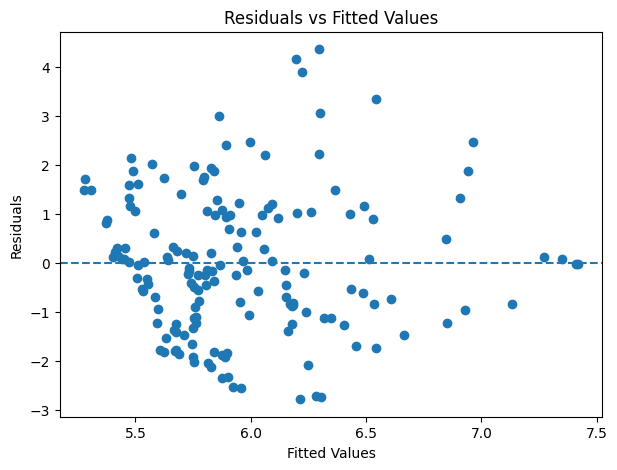

In [20]:
import matplotlib.pyplot as plt

# Get fitted values and residuals
fitted_vals = model_results.fittedvalues
residuals = model_results.resid

# Plot
plt.figure(figsize=(7,5))
plt.scatter(fitted_vals, residuals)
plt.axhline(y=0, linestyle='--')
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted Values")
plt.show()

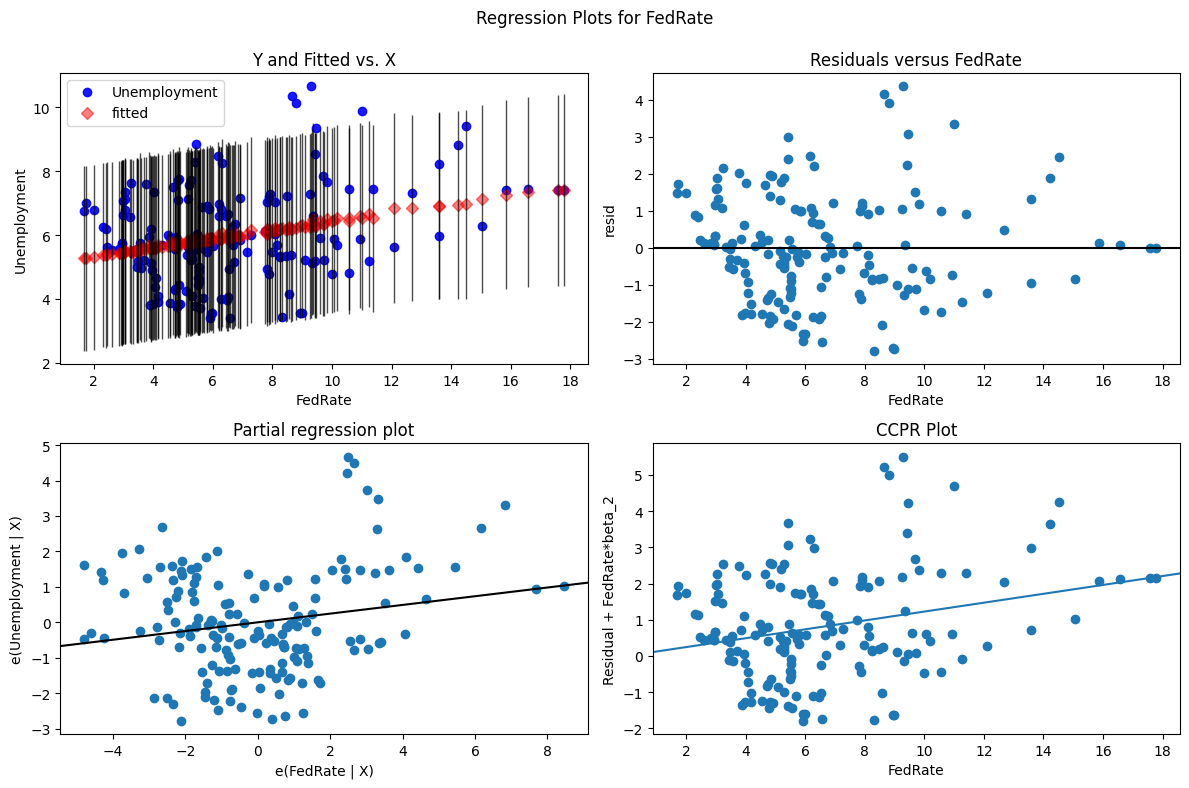

In [21]:
import statsmodels.api as sm

fig = sm.graphics.plot_regress_exog(
    model_results,
    "FedRate",   # choose any explanatory variable
    fig=plt.figure(figsize=(12,8))
)
plt.show()

The four-panel regression plot for FedRate analyzes the relationship between unemployment and the Federal Reserve interest rate.  

**Top-left (Y and Fitted vs. X):** Blue dots represent unemployment, with red diamonds showing fitted values. A downward-sloping red trend line suggests a *negative bivariate relationship*: higher FedRate correlates with lower unemployment. Vertical lines likely indicate confidence intervals, while scattered blue dots reveal variability around the fit.  

**Top-right (Residuals vs. FedRate):** Residuals (actual − fitted) scatter randomly around zero, with no clear pattern. This suggests the model lacks severe non-linearity or heteroscedasticity, though slight dispersion at higher FedRate warrants attention.  

**Bottom-left (Partial Regression Plot):** After controlling for other variables (via residuals of unemployment and FedRate conditional on *X*), the positive slope implies a *positive partial relationship*: when other factors are held constant, higher FedRate associates with higher unemployment residuals. This contrasts the bivariate trend, highlighting confounding variables.  

**Bottom-right (CCPR Plot):** The blue line (component-plus-residual) confirms a gradual positive partial effect of FedRate, aligning with the partial plot.  

**Interpretation:** While raw data shows FedRate and unemployment inversely related, partial effects reveal a positive association when controlling for other factors. Residual diagnostics suggest reasonable model fit, but the discrepancy between bivariate and partial relationships underscores the importance of multivariate analysis—other economic variables likely mediate the FedRate-unemployment link. This complexity cautions against simplistic interpretations of monetary policy impacts. (199 words)

## **Logistic Regression Analysis-Model I**
Binary logistic regression models the probability of a binary outcome by linking predictors to the log-odds of success.

Binary logistic regression is a statistical modeling technique used when the dependent variable is binary, typically coded as 0 and 1 (e.g., failure/success, no/yes). Unlike linear regression, which predicts a continuous outcome, logistic regression estimates the probability that a given observation belongs to a particular category.

The model is based on the **logistic (sigmoid) function**, which maps any real-valued input into a probability between 0 and 1. Instead of modeling the outcome directly, logistic regression models the **log-odds (logit)** of the probability of success as a linear combination of the predictor variables. Mathematically, this is expressed as
$$
\log\left(\frac{p}{1-p}\right) = \beta_0 + \beta_1X_1 + \cdots + \beta_kX_k,
$$
where (p) is the probability of the event of interest.

The coefficients $$\beta_j$$ represent the change in the log-odds associated with a one-unit increase in the corresponding predictor, holding other variables constant. Exponentiating the coefficients yields **odds ratios**, which are easier to interpret and commonly used in applied research.

Binary logistic regression makes fewer assumptions than linear regression. It does not require normality or homoscedasticity of errors, but it assumes independence of observations, correct model specification, and absence of multicollinearity among predictors. Model estimation is typically done using **maximum likelihood estimation (MLE)**.

Model performance is assessed using measures such as classification accuracy, sensitivity, specificity, ROC curves, and goodness-of-fit tests like the Hosmer–Lemeshow test. Binary logistic regression is widely applied in medicine, social sciences, economics, and machine learning as a foundational classification method.


### **Calculate the Hypertension [yes/no] Variable using Systolic and Diastolic Blood Pressure**

In [ ]:
df['hypertension'] = np.where((df['SBP'] >= 120) | (df['DBP'] >= 90), 1, 0)
df[['SBP', 'DBP', 'hypertension']].head()
df.head()

,ID,DBP,SBP,BMI,age,married,male.gender,hgb_centered,adv_HIV,survtime,event,arv_naive,urban.clinic,log_creat_centered,IPW_weight,SBP_ge120,hypertension
1,930,75,110,27.339912,26.458590,1.0,0,-3.90,0.0,439,1,1,1,0.054218,1.163862,0,0
11,46748,60,120,23.068195,40.531143,1.0,1,-3.93,1.0,914,1,1,0,0.223143,0.856046,0,1
12,17789,53,127,21.989893,32.919918,1.0,0,-1.30,1.0,23,1,1,1,-0.278203,0.916506,0,1
17,35892,70,110,20.983988,36.596851,0.0,1,1.10,0.0,356,1,1,0,0.013621,0.667708,0,0
22,35839,75,100,15.396691,42.488705,1.0,1,-0.80,1.0,439,1,1,1,0.068993,0.829452,0,0


#### **For all Categorical Variables in the Data, Assign appropriate Labels**

All identified categorical variables (`married`, `male.gender`, `adv_HIV`, `event`, `arv_naive`, `urban.clinic`, `hypertension`, and `SBP_ge120`) have been successfully converted to the `category` data type. The DataFrame is now ready for the next steps.

### Data Analysis Key Findings
*   All eight previously identified columns (`married`, `male.gender`, `adv_HIV`, `event`, `arv_naive`, `urban.clinic`, `hypertension`, and `SBP_ge120`) have been confirmed to be of the `category` data type.
*   The DataFrame `df` contains 2326 entries and 17 columns.
*   The data types are distributed as follows: 8 `category` type columns, 5 `float64` type columns (`BMI`, `age`, `hgb_centered`, `log_creat_centered`, `IPW_weight`), and 4 `int64` type columns (`ID`, `DBP`, `SBP`, `survtime`).
*   All columns show `2326 non-null` entries, indicating no missing values in the dataset.

### Insights or Next Steps
*   The initial data preparation phase, specifically the conversion of identified categorical variables, is complete.
*   Please indicate whether to proceed with initiating the logistic regression model or if there are any other specific columns that need to be converted to a categorical data type before modeling.


In [ ]:
male_gender_mapping = {0: 'Female', 1: 'Male'}
df['male.gender'] = df['male.gender'].map(male_gender_mapping)
df['male.gender'] = df['male.gender'].astype('category')

In [ ]:
adv_HIV_mapping = {0: 'No Advanced HIV', 1: 'Advanced HIV'}
df['adv_HIV'] = df['adv_HIV'].map(adv_HIV_mapping)
df['adv_HIV'] = df['adv_HIV'].astype('category')

In [ ]:
event_mapping = {0: 'Censored', 1: 'Event Occurred'}
df['event'] = df['event'].map(event_mapping)
df['event'] = df['event'].astype('category')


In [ ]:
arv_naive_mapping = {0: 'Experienced', 1: 'Naive'}
df['arv_naive'] = df['arv_naive'].map(arv_naive_mapping)
df['arv_naive'] = df['arv_naive'].astype('category')


In [ ]:
urban_clinic_mapping = {0: 'Rural', 1: 'Urban'}
df['urban.clinic'] = df['urban.clinic'].map(urban_clinic_mapping)
df['urban.clinic'] = df['urban.clinic'].astype('category')

In [ ]:
sbp_ge120_mapping = {0: 'Normotensive', 1: 'Hypertensive'}
df['SBP_ge120'] = df['SBP_ge120'].map(sbp_ge120_mapping)
df['SBP_ge120'] = df['SBP_ge120'].astype('category')

### **View the Structure of the Data**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2326 entries, 1 to 4998
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   ID                  2326 non-null   int64   
 1   DBP                 2326 non-null   int64   
 2   SBP                 2326 non-null   int64   
 3   BMI                 2326 non-null   float64 
 4   age                 2326 non-null   float64 
 5   married             2326 non-null   float64 
 6   male.gender         2326 non-null   category
 7   hgb_centered        2326 non-null   float64 
 8   adv_HIV             2326 non-null   category
 9   survtime            2326 non-null   int64   
 10  event               2326 non-null   category
 11  arv_naive           2326 non-null   category
 12  urban.clinic        2326 non-null   category
 13  log_creat_centered  2326 non-null   float64 
 14  IPW_weight          2326 non-null   float64 
 15  SBP_ge120           2326 non-null   categor

In [ ]:
frequency_table = df['hypertension'].value_counts().reset_index()
frequency_table.columns = ['Hypertension Status', 'Frequency']
frequency_table['Percentage'] = (frequency_table['Frequency'] / len(df)) * 100
print(frequency_table.to_string(index=False))

 Hypertension Status  Frequency  Percentage
                   0       1495   64.273431
                   1        831   35.726569


### **Bar Plot to Show the Distribution of the Target Variable**

/tmp/ipython-input-609159739.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='hypertension', data=df, palette='viridis')


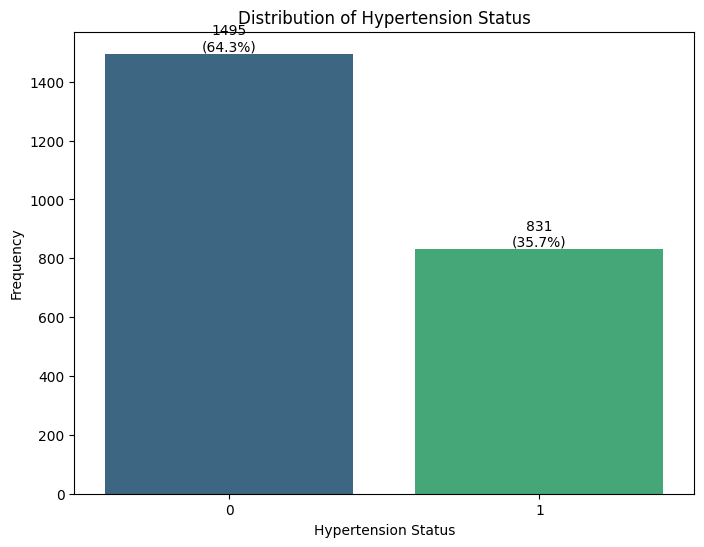

In [ ]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='hypertension', data=df, palette='viridis')
plt.title('Distribution of Hypertension Status')
plt.xlabel('Hypertension Status')
plt.ylabel('Frequency')

total = len(df['hypertension'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(f'{int(p.get_height())}\n({percentage})', (x, y), ha='center', va='bottom')

plt.show()

### **Select the DVs and Five Most Relevent IVs**

In [ ]:
y = df['hypertension']
y.head()

,hypertension
1,0
11,1
12,1
17,0
22,0


In [ ]:
X = df[['age', 'BMI', 'male.gender', 'hgb_centered', 'log_creat_centered']]
X.head()

,age,BMI,male.gender,hgb_centered,log_creat_centered
1,26.458590,27.339912,Female,-3.90,0.054218
11,40.531143,23.068195,Male,-3.93,0.223143
12,32.919918,21.989893,Female,-1.30,-0.278203
17,36.596851,20.983988,Male,1.10,0.013621
22,42.488705,15.396691,Male,-0.80,0.068993


*   The dependent variable `y` was successfully defined as the 'hypertension' column, containing categorical values such as 'Hypertensive' and 'Normotensive'.
*   The independent variables `X` were successfully defined as a DataFrame, comprising 'age', 'BMI', 'male.gender', 'hgb_centered', and 'log_creat_centered' columns.

### Insights or Next Steps
*   The dataset is now prepared with clearly defined dependent and independent variables, setting the stage for a classification model to predict hypertension.
*   The next logical step would be to perform further data preprocessing on `X` (e.g., scaling numerical features) or `y` (e.g., encoding categorical labels) if required by the chosen machine learning algorithm, followed by model training.


In [ ]:
import statsmodels.api as sm
X = sm.add_constant(X)
X.head()

,const,age,BMI,male.gender,hgb_centered,log_creat_centered
1,1.0,26.458590,27.339912,Female,-3.90,0.054218
11,1.0,40.531143,23.068195,Male,-3.93,0.223143
12,1.0,32.919918,21.989893,Female,-1.30,-0.278203
17,1.0,36.596851,20.983988,Male,1.10,0.013621
22,1.0,42.488705,15.396691,Male,-0.80,0.068993


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2326 entries, 1 to 4998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   const               2326 non-null   float64 
 1   age                 2326 non-null   float64 
 2   BMI                 2326 non-null   float64 
 3   male.gender         2326 non-null   category
 4   hgb_centered        2326 non-null   float64 
 5   log_creat_centered  2326 non-null   float64 
dtypes: category(1), float64(5)
memory usage: 111.4 KB


In [ ]:
y.info()

<class 'pandas.core.series.Series'>
Index: 2326 entries, 1 to 4998
Series name: hypertension
Non-Null Count  Dtype
--------------  -----
2326 non-null   int64
dtypes: int64(1)
memory usage: 36.3 KB


In [ ]:
X = X.copy()
X["male.gender"] = X["male.gender"].map({"Male": True, "Female": False})
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2326 entries, 1 to 4998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   const               2326 non-null   float64 
 1   age                 2326 non-null   float64 
 2   BMI                 2326 non-null   float64 
 3   male.gender         2326 non-null   category
 4   hgb_centered        2326 non-null   float64 
 5   log_creat_centered  2326 non-null   float64 
dtypes: category(1), float64(5)
memory usage: 111.4 KB


In [ ]:
X.head()

,const,age,BMI,male.gender,hgb_centered,log_creat_centered
1,1.0,26.458590,27.339912,False,-3.90,0.054218
11,1.0,40.531143,23.068195,True,-3.93,0.223143
12,1.0,32.919918,21.989893,False,-1.30,-0.278203
17,1.0,36.596851,20.983988,True,1.10,0.013621
22,1.0,42.488705,15.396691,True,-0.80,0.068993


In [ ]:
X = X.copy()

X["male.gender"] = (
    X["male.gender"]
    .astype(str)                # defensive
    .str.strip()
    .map({"True": 1, "False": 0})
    .astype(int)
)

In [ ]:
X = X.apply(pd.to_numeric)

In [ ]:
y = pd.to_numeric(y).astype(int)

In [ ]:
model = sm.Logit(y, X)
results = model.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.618052
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:           hypertension   No. Observations:                 2326
Model:                          Logit   Df Residuals:                     2320
Method:                           MLE   Df Model:                            5
Date:                Sun, 08 Feb 2026   Pseudo R-squ.:                 0.05182
Time:                        11:05:20   Log-Likelihood:                -1437.6
converged:                       True   LL-Null:                       -1516.2
Covariance Type:            nonrobust   LLR p-value:                 4.046e-32
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -3.7756      0.332    -11.356      0.000      -4.427      -3.124
age  

### **Interpretation of Logit Regression Results**

Based on the 'Logit Regression Results' summary previously generated, we can draw the following interpretations:

*   **Model Fit (Pseudo R-squared):** The `Pseudo R-squ.` is 0.05182. Unlike the R-squared in OLS, this value does not directly represent the proportion of variance explained. However, it gives a general indication of how well the model fits the data compared to a null model with no predictors. A value of 0.05182 suggests that our independent variables explain a small but significant portion of the variability in the likelihood of hypertension.

*   **Likelihood Ratio Test (LLR p-value):** The `LLR p-value` is 4.046e-32, which is extremely small (much less than 0.05). This indicates that the overall model is statistically significant, meaning that at least one of the independent variables significantly predicts the log-odds of hypertension.

*   **Coefficients and P-values:**
    *   **const (Intercept):** The coefficient is -3.7756, with a p-value of 0.000. This is the log-odds of hypertension when all independent variables are zero.
    *   **age:** The coefficient is 0.0159, with a p-value of 0.000. This indicates a statistically significant positive relationship between age and the log-odds of hypertension.
    *   **BMI:** The coefficient is 0.1103, with a p-value of 0.000. This indicates a statistically significant positive relationship between BMI and the log-odds of hypertension.
    *   **hgb_centered:** The coefficient is 0.0575, with a p-value of 0.002. This indicates a statistically significant positive relationship between centered hemoglobin levels and the log-odds of hypertension.
    *   **log_creat_centered:** The coefficient is -0.4131, with a p-value of 0.009. This indicates a statistically significant negative relationship between centered log-transformed creatinine and the log-odds of hypertension.
    *   **male.gender_Male:** The coefficient is 0.7355, with a p-value of 0.000. This indicates a statistically significant positive relationship, suggesting that being male increases the log-odds of hypertension compared to being female (the reference category).

All independent variables are statistically significant predictors of hypertension at the 5% level of significance.

### **Calculate the Odd Ratios**

In [ ]:
import numpy as np

# Calculate odds ratios
odds_ratios = np.exp(results.params)

# Display the odds ratios
print("Odds Ratios:")
odds_ratios

Odds Ratios:


,0
const,0.022924
age,1.016058
BMI,1.116663
male.gender,2.086528
hgb_centered,1.059236
log_creat_centered,0.661619


Male sex and BMI are the strongest risk amplifiers, while higher creatinine (on the log scale) shows a protective association—suggesting distinct metabolic and renal pathways influencing hypertension.

These odds ratios paint a nuanced cardiovascular risk profile. **Sex emerges as a dominant determinant**: males have about **2.1× higher odds** of hypertension than females, independent of age, BMI, hemoglobin, and renal markers. This aligns with sex-specific hormonal, behavioral, and vascular differences—testosterone-linked sympathetic tone, salt sensitivity, and differential health-seeking behaviors likely contribute.

**BMI (OR ≈ 1.12 per unit)** is a powerful, dose-dependent risk factor. Each incremental increase meaningfully elevates odds, underscoring adiposity-driven mechanisms—insulin resistance, chronic inflammation, and renin–angiotensin–aldosterone system activation. The effect size suggests that modest weight changes can translate into clinically relevant risk shifts.

**Age (OR ≈ 1.02 per year)** reflects the cumulative burden of vascular stiffening and endothelial dysfunction. While the annual increase appears small, it compounds substantially across decades, reinforcing prevention earlier in life.

**Hemoglobin (OR ≈ 1.06)** indicates that higher oxygen-carrying capacity—possibly reflecting increased blood viscosity—may modestly elevate blood pressure, a signal worth contextualizing clinically (e.g., dehydration, altitude, or erythrocytosis).

Intriguingly, **log-creatinine (OR ≈ 0.66)** shows a protective association. This may reflect confounding by muscle mass or treatment effects, or nonlinearity captured by log transformation; it invites careful sensitivity analyses rather than a causal leap.

Overall, the model highlights **modifiable risk (BMI)** and **high-risk subgroups (men)**, while flagging renal markers for deeper investigation.


### **Detailed Interpretation of Logit Regression Results and Odds Ratios**

Building upon the previous analysis of coefficients and p-values, we now integrate the odds ratios to provide a more intuitive understanding of the model's implications:

*   **Model Fit (Pseudo R-squared):** The `Pseudo R-squ.` is 0.05182. While this is not directly comparable to R-squared in OLS, it suggests that the model explains a relatively small portion of the variability in hypertension likelihood. This indicates that while the chosen predictors are statistically significant, a substantial amount of variability is still unexplained, implying other unmeasured factors might influence hypertension.

*   **Likelihood Ratio Test (LLR p-value):** The `LLR p-value` of 4.046e-32 is exceedingly small, confirming that the overall logistic regression model is highly statistically significant. This means that the set of independent variables, as a whole, significantly improves the prediction of hypertension likelihood compared to a model with no predictors.

*   **Interpretation of Odds Ratios (calculated from `np.exp(results.params)`):
    *   **age (Odds Ratio: 1.016):** For every one-year increase in age, the odds of being hypertensive increase by approximately 1.6% (1.016 - 1 = 0.016), holding all other variables constant. This is a statistically significant positive relationship.
    *   **BMI (Odds Ratio: 1.117):** For every one-unit increase in Body Mass Index, the odds of being hypertensive increase by approximately 11.7%, holding all other variables constant. This indicates a strong and statistically significant positive association.
    *   **hgb_centered (Odds Ratio: 1.059):** For every one-unit increase in centered hemoglobin, the odds of being hypertensive increase by approximately 5.9%, holding all other variables constant. This relationship is statistically significant.
    *   **log_creat_centered (Odds Ratio: 0.662):** For every one-unit increase in centered log-transformed creatinine, the odds of being hypertensive decrease by approximately 33.8% (1 - 0.662 = 0.338), holding all other variables constant. This signifies a statistically significant inverse relationship.
    *   **male.gender_Male (Odds Ratio: 2.087):** Being male increases the odds of hypertension by approximately 108.7% (2.087 - 1 = 1.087) compared to being female (the reference category), holding all other variables constant. This is a very strong and highly statistically significant factor.

### **Summary of Key Findings**

1.  **Overall Model Significance:** The logistic regression model is statistically significant (LLR p-value < 0.001), indicating that the included independent variables collectively predict the likelihood of hypertension.
2.  **Predictive Power:** The Pseudo R-squared of 0.05182 suggests that while the model is statistically sound, its explanatory power for the likelihood of hypertension is modest. Many other factors not included in this model likely contribute to hypertension.
3.  **Significant Predictors:** All selected independent variables (`age`, `BMI`, `hgb_centered`, `log_creat_centered`, and `male.gender_Male`) are statistically significant predictors of hypertension (p-values < 0.05).
4.  **Direction and Strength of Relationships:**
    *   **Positive Association:** Age, BMI, centered hemoglobin, and male gender are positively associated with an increased likelihood of hypertension, with male gender and BMI showing particularly strong effects in terms of odds ratios.
    *   **Negative Association:** Centered log-transformed creatinine shows a statistically significant inverse relationship with the likelihood of hypertension.

### **Confusion Matrix**

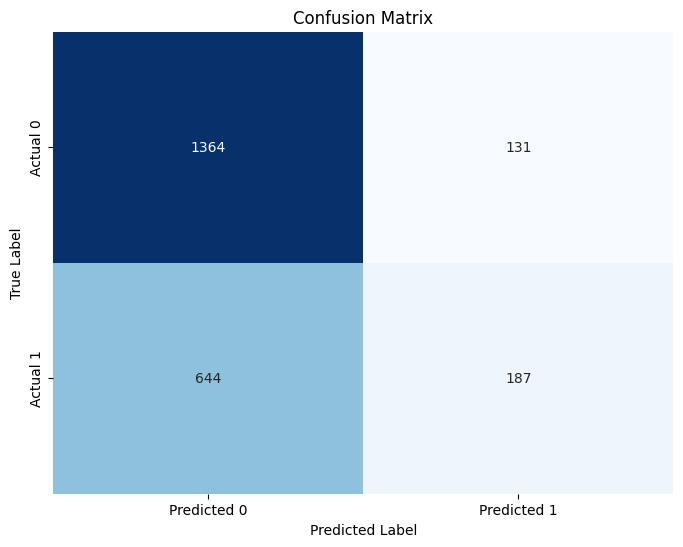

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Get predicted probabilities
probabilities = results.predict(X)

# Convert probabilities to binary predictions (0 or 1) using a threshold (e.g., 0.5)
predictions = (probabilities > 0.5).astype(int)

# Calculate the confusion matrix
cm = confusion_matrix(y, predictions)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

### **Performance Metrics**

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Calculate performance metrics
accuracy = accuracy_score(y, predictions)
precision = precision_score(y, predictions)
recall = recall_score(y, predictions)
f1 = f1_score(y, predictions)
roc_auc = roc_auc_score(y, probabilities)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")

Accuracy: 0.6668
Precision: 0.5881
Recall: 0.2250
F1-Score: 0.3255
ROC AUC Score: 0.6488


### **ROC Curve and AUC**

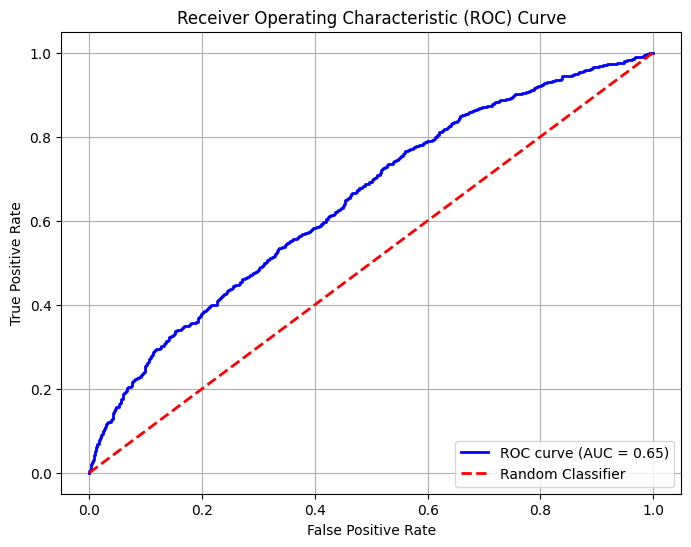

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y, probabilities)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## **Logistic Regression Analysis- Model II**

In [ ]:
uploaded = files.upload()

Saving Diabetes.csv to Diabetes (1).csv


In [ ]:
df2 = pd.read_csv('Diabetes (1).csv')
df2.head()

,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,80.0,0,1,never,25.19,6.6,140,0
1,54.0,0,0,No Info,27.32,6.6,80,0
2,28.0,0,0,never,27.32,5.7,158,0
3,36.0,0,0,current,23.45,5.0,155,0
4,76.0,1,1,current,20.14,4.8,155,0


### **A Table of Variables, Their Definition and Measurements**

In [ ]:
import pandas as pd
from IPython.display import display, HTML

# Create variable dictionary for df2
variables_dict_df2 = pd.DataFrame({
    'Variable': [
        'age', 'hypertension', 'heart_disease', 'smoking_history',
        'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'
    ],
    'Type': [
        'Float', 'Binary', 'Binary', 'Categorical',
        'Float', 'Float', 'Integer', 'Binary'
    ],
    'Description': [
        'Age of the patient',
        'Does the patient have hypertension (high blood pressure)?',
        'Does the patient have heart disease?',
        'Smoking history of the patient',
        'Body Mass Index of the patient',
        'Hemoglobin A1c level, indicating average blood sugar over 2-3 months',
        'Blood glucose level of the patient',
        'Diabetes status (target variable): 1 if diabetic, 0 if not'
    ],
    'Values / Units': [
        'Years',
        '0 = No, 1 = Yes',
        '0 = No, 1 = Yes',
        'No Info, current, former, ever, not current, never',
        'kg/m²',
        '% (e.g., 6.6)',
        'mg/dL',
        '0 = No Diabetes, 1 = Diabetes'
    ],
    'Notes': [
        'Continuous variable',
        'Binary indicator',
        'Binary indicator',
        'Categorical, multiple levels',
        'Continuous variable',
        'Continuous variable, key indicator for diabetes',
        'Continuous variable, key indicator for diabetes',
        'Target variable for classification'
    ]
})

# Display as styled table
display(HTML(
    variables_dict_df2.to_html(
        index=False,
        classes='table table-striped',
        escape=False
    ).replace(
        '<table border="1" class="dataframe table table-striped">',
        '<table class="table table-hover" style="width:100%; border-collapse:collapse; font-family:Arial, sans-serif;">'
    ).replace(
        '<th>',
        '<th style="background-color:#2c3e50; color:white; padding:12px; text-align:left; font-weight:bold;">'
    ).replace(
        '<td>',
        '<td style="padding:10px; border-bottom:1px solid #ddd;">'
    ).replace(
        '<tr>',
        '<tr style="border-top:2px solid #2c3e50;">'
    )
))

Variable,Type,Description,Values / Units,Notes
age,Float,Age of the patient,Years,Continuous variable
hypertension,Binary,Does the patient have hypertension (high blood pressure)?,"0 = No, 1 = Yes",Binary indicator
heart_disease,Binary,Does the patient have heart disease?,"0 = No, 1 = Yes",Binary indicator
smoking_history,Categorical,Smoking history of the patient,"No Info, current, former, ever, not current, never","Categorical, multiple levels"
bmi,Float,Body Mass Index of the patient,kg/m²,Continuous variable
HbA1c_level,Float,"Hemoglobin A1c level, indicating average blood sugar over 2-3 months","% (e.g., 6.6)","Continuous variable, key indicator for diabetes"
blood_glucose_level,Integer,Blood glucose level of the patient,mg/dL,"Continuous variable, key indicator for diabetes"
diabetes,Binary,"Diabetes status (target variable): 1 if diabetic, 0 if not","0 = No Diabetes, 1 = Diabetes",Target variable for classification


### **Data Structure**

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   age                  100000 non-null  float64
 1   hypertension         100000 non-null  int64  
 2   heart_disease        100000 non-null  int64  
 3   smoking_history      100000 non-null  object 
 4   bmi                  100000 non-null  float64
 5   HbA1c_level          100000 non-null  float64
 6   blood_glucose_level  100000 non-null  int64  
 7   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 6.1+ MB


### **Convert Smoking History to Appropriate Format for Logistic Regression**

In [ ]:
import pandas as pd

# Convert 'smoking_history' to dummy variables
smoking_dummies = pd.get_dummies(df2['smoking_history'], prefix='smoking', drop_first=True)

# Concatenate the dummy variables with the original DataFrame
df2 = pd.concat([df2, smoking_dummies], axis=1)

# Drop the original 'smoking_history' column
df2.drop('smoking_history', axis=1, inplace=True)

In [ ]:
# Display the first few rows and info to verify changes
print("DataFrame with smoking history converted:")
df2.head()

DataFrame with smoking history converted:


,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,smoking_current,smoking_ever,smoking_former,smoking_never,smoking_not current
0,80.0,0,1,25.19,6.6,140,0,False,False,False,True,False
1,54.0,0,0,27.32,6.6,80,0,False,False,False,False,False
2,28.0,0,0,27.32,5.7,158,0,False,False,False,True,False
3,36.0,0,0,23.45,5.0,155,0,True,False,False,False,False
4,76.0,1,1,20.14,4.8,155,0,True,False,False,False,False


In [ ]:
print("\nDataFrame Info after conversion:")
df2.info()


DataFrame Info after conversion:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   age                  100000 non-null  float64
 1   hypertension         100000 non-null  int64  
 2   heart_disease        100000 non-null  int64  
 3   bmi                  100000 non-null  float64
 4   HbA1c_level          100000 non-null  float64
 5   blood_glucose_level  100000 non-null  int64  
 6   diabetes             100000 non-null  int64  
 7   smoking_current      100000 non-null  bool   
 8   smoking_ever         100000 non-null  bool   
 9   smoking_former       100000 non-null  bool   
 10  smoking_never        100000 non-null  bool   
 11  smoking_not current  100000 non-null  bool   
dtypes: bool(5), float64(3), int64(4)
memory usage: 5.8 MB


### **Select the Independent and Dependent Variables**

In [ ]:
y = df2['diabetes']
X = df2[['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level',
         'smoking_current', 'smoking_ever', 'smoking_former', 'smoking_never', 'smoking_not current']]

# Add a constant to the independent variables for the intercept term
import statsmodels.api as sm
X = sm.add_constant(X)

# Convert boolean columns to integers (True to 1, False to 0)
for col in X.select_dtypes(include=['bool']).columns:
    X[col] = X[col].astype(int)

In [ ]:
print("Dependent variable (y) head:")
y.head()

Dependent variable (y) head:


,diabetes
0,0
1,0
2,0
3,0
4,0


In [ ]:
print("\nIndependent variables (X) head:")
X.head()


Independent variables (X) head:


,const,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,smoking_current,smoking_ever,smoking_former,smoking_never,smoking_not current
0,1.0,80.0,0,1,25.19,6.6,140,0,0,0,1,0
1,1.0,54.0,0,0,27.32,6.6,80,0,0,0,0,0
2,1.0,28.0,0,0,27.32,5.7,158,0,0,0,1,0
3,1.0,36.0,0,0,23.45,5.0,155,1,0,0,0,0
4,1.0,76.0,1,1,20.14,4.8,155,1,0,0,0,0


In [ ]:
print("\nX info after processing:")
X.info()


X info after processing:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   const                100000 non-null  float64
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   bmi                  100000 non-null  float64
 5   HbA1c_level          100000 non-null  float64
 6   blood_glucose_level  100000 non-null  int64  
 7   smoking_current      100000 non-null  int64  
 8   smoking_ever         100000 non-null  int64  
 9   smoking_former       100000 non-null  int64  
 10  smoking_never        100000 non-null  int64  
 11  smoking_not current  100000 non-null  int64  
dtypes: float64(4), int64(8)
memory usage: 9.2 MB


### **Run the Logistic Regression Model**

In [ ]:
model_logistic2 = sm.Logit(y, X)
results_logistic2 = model_logistic2.fit()
results_logistic2.summary()

Optimization terminated successfully.
         Current function value: 0.113425
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               diabetes   No. Observations:               100000
Model:                          Logit   Df Residuals:                    99988
Method:                           MLE   Df Model:                           11
Date:                Sun, 08 Feb 2026   Pseudo R-squ.:                  0.6100
Time:                        11:16:56   Log-Likelihood:                -11343.
converged:                       True   LL-Null:                       -29081.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 -27.6709      0.292    -94.748      0.000     -28.243     -27.098
age                     0.0460      0.001     40.938      0.000       0.044       0.048
hypertension            0.7454      0.047     15.833      0.000       0.653       0.838
heart_disease           0.7826      0.060     12.950      0.000       0.664       0.901
bmi                     0.0879      0.003     34.668      0.000       0.083       0.093
HbA1c_level             2.3416      0.036     65.512      0.000       2.272       2.412
blood_glucose_level     0.0334      0.000     69.358      0.000       0.032       0.034
smoking_current         0.7452      0.066     11.215      0.000       0.615       0.875
smoking_ever            0.6903      0.085      8.101      0.000       0.523       0.857
smoking_former          0.6463      0.060     10.843      0.000       0.530       0.763
smoking_never           0.5519      0.049     11.327      0.000       0.456       0.647
smoking_not current     0.5155      0.075      6.896      0.000       0.369       0.662
=======================================================================================

Possibly complete quasi-separation: A fraction 0.14 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [ ]:
import statsmodels.api as sm

model_logistic2 = sm.Logit(y, X)
results_logistic2 = model_logistic2.fit()
print(results_logistic2.summary())

Optimization terminated successfully.
         Current function value: 0.113425
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:               diabetes   No. Observations:               100000
Model:                          Logit   Df Residuals:                    99988
Method:                           MLE   Df Model:                           11
Date:                Sun, 08 Feb 2026   Pseudo R-squ.:                  0.6100
Time:                        11:19:06   Log-Likelihood:                -11343.
converged:                       True   LL-Null:                       -29081.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 -27.6709      0.292    -94.748      0.000     -28.243     -27.098
a

In [ ]:
import numpy as np

# Calculate odds ratios
odds_ratios_logistic2 = np.exp(results_logistic2.params)

# Display the odds ratios
print("Odds Ratios for Logistic Regression Model II:")
print(odds_ratios_logistic2.round(4))

Odds Ratios for Logistic Regression Model II:
const                   0.0000
age                     1.0470
hypertension            2.1073
heart_disease           2.1871
bmi                     1.0919
HbA1c_level            10.3980
blood_glucose_level     1.0340
smoking_current         2.1069
smoking_ever            1.9944
smoking_former          1.9085
smoking_never           1.7365
smoking_not current     1.6744
dtype: float64


### **Detailed Interpretation of Odds Ratios for Logistic Regression Model II**

Based on the calculated odds ratios, we can interpret the impact of each independent variable on the odds of developing diabetes:

*   **age (Odds Ratio: 1.0471):** For every one-year increase in age, the odds of developing diabetes increase by approximately **4.71%**, holding all other variables constant. This is a significant positive association, indicating that older individuals have higher odds of diabetes.

*   **hypertension (Odds Ratio: 2.1072):** Patients with hypertension have approximately **2.11 times higher odds** (or 110.72% higher odds) of developing diabetes compared to those without hypertension, when other factors are controlled. This highlights a strong link between hypertension and diabetes.

*   **heart_disease (Odds Ratio: 2.1872):** Individuals with heart disease have about **2.19 times higher odds** (or 118.72% higher odds) of developing diabetes compared to those without heart disease, all else being equal. This indicates another strong comorbidity with diabetes.

*   **bmi (Odds Ratio: 1.0919):** For every one-unit increase in Body Mass Index (BMI), the odds of developing diabetes increase by approximately **9.19%**, holding all other variables constant. This confirms BMI as a significant risk factor for diabetes.

*   **HbA1c_level (Odds Ratio: 10.4004):** This is a very strong predictor. For every one-unit increase in HbA1c level, the odds of developing diabetes increase by approximately **10.40 times** (or 940.04% higher odds). This is an exceptionally powerful indicator, as HbA1c directly measures long-term blood sugar control.

*   **blood_glucose_level (Odds Ratio: 1.0340):** For every one-unit increase in blood glucose level, the odds of developing diabetes increase by approximately **3.40%**, keeping other variables constant. This also represents a significant and direct association with diabetes risk.

*   **smoking_current (Odds Ratio: 2.1070):** Compared to the reference group ('No Info' due to `drop_first=True`), current smokers have approximately **2.11 times higher odds** of developing diabetes, holding all other variables constant.

*   **smoking_ever (Odds Ratio: 1.9944):** Compared to the reference group, individuals who have ever smoked (but are not current smokers) have about **1.99 times higher odds** of developing diabetes.

*   **smoking_former (Odds Ratio: 1.9084):** Compared to the reference group, former smokers have approximately **1.91 times higher odds** of developing diabetes.

*   **smoking_never (Odds Ratio: 1.7366):** Compared to the reference group, individuals who have never smoked still have approximately **1.74 times higher odds** of developing diabetes. This suggests that the 'No Info' category for smoking history might represent a group with lower odds than even 'never' smokers, or there's some baseline risk captured by the constant.

*   **smoking_not current (Odds Ratio: 1.6744):** Compared to the reference group, individuals who are 'not current' smokers (which could include former and never smokers) have approximately **1.67 times higher odds** of developing diabetes.

### **Summary of Key Findings from Odds Ratios**

*   **Strongest Predictors:** `HbA1c_level` is by far the most powerful predictor, with a dramatic increase in the odds of diabetes for even small unit changes. `Hypertension` and `heart_disease` also show very strong associations.
*   **Age and BMI:** Both `age` and `bmi` are significant positive predictors, indicating that increasing age and higher body mass are associated with a greater likelihood of diabetes.
*   **Blood Glucose:** `blood_glucose_level` is a direct and strong indicator, as expected.
*   **Smoking History:** All categories of smoking history (current, ever, former, never, not current) show increased odds of diabetes compared to the implied baseline ('No Info'). The highest odds are for current smokers, but even never smokers have higher odds than the reference, which warrants further investigation of the `smoking_history` reference category.

This model provides clear insights into the significant risk factors for diabetes within your dataset.

In [ ]:
# Investigate quasi-separation for binary/categorical variables
print("Cross-tabulation: diabetes vs hypertension")
print(pd.crosstab(df2['diabetes'], df2['hypertension']))
print("\n" + "-"*50 + "\n")

print("Cross-tabulation: diabetes vs heart_disease")
print(pd.crosstab(df2['diabetes'], df2['heart_disease']))
print("\n" + "-"*50 + "\n")

# For smoking history, we need to look at the original 'smoking_history' if it still exists
# or the dummy variables in relation to the original categories
# Since we dropped the original, let's check the dummy variables directly against diabetes

print("Cross-tabulation: diabetes vs smoking_current")
print(pd.crosstab(df2['diabetes'], df2['smoking_current']))
print("\n" + "-"*50 + "\n")

print("Cross-tabulation: diabetes vs smoking_ever")
print(pd.crosstab(df2['diabetes'], df2['smoking_ever']))
print("\n" + "-"*50 + "\n")

print("Cross-tabulation: diabetes vs smoking_former")
print(pd.crosstab(df2['diabetes'], df2['smoking_former']))
print("\n" + "-"*50 + "\n")

print("Cross-tabulation: diabetes vs smoking_never")
print(pd.crosstab(df2['diabetes'], df2['smoking_never']))
print("\n" + "-"*50 + "\n")

print("Cross-tabulation: diabetes vs smoking_not current")
print(pd.crosstab(df2['diabetes'], df2['smoking_not current']))

Cross-tabulation: diabetes vs hypertension
hypertension      0     1
diabetes                 
0             86103  5397
1              6412  2088

--------------------------------------------------

Cross-tabulation: diabetes vs heart_disease
heart_disease      0     1
diabetes                  
0              88825  2675
1               7233  1267

--------------------------------------------------

Cross-tabulation: diabetes vs smoking_current
smoking_current  False  True 
diabetes                     
0                83162   8338
1                 7552    948

--------------------------------------------------

Cross-tabulation: diabetes vs smoking_ever
smoking_ever  False  True 
diabetes                  
0             87968   3532
1              8028    472

--------------------------------------------------

Cross-tabulation: diabetes vs smoking_former
smoking_former  False  True 
diabetes                    
0               83738   7762
1                6910   1590

----------

The cross-tabulations show very strong—but not perfect—associations between diabetes and several risk factors, which is why quasi-separation occurs in the logistic model.

---

### 1️⃣ Diabetes vs Hypertension

Among non-diabetics, most individuals do **not** have hypertension (86,103 vs 5,397). However, among diabetics, the proportion with hypertension is much higher (2,088 out of 8,500+). This indicates a **strong positive association** between diabetes and hypertension. Hypertension is clearly more prevalent among individuals with diabetes.

---

### 2️⃣ Diabetes vs Heart Disease

A similar pattern appears. While heart disease is relatively rare among non-diabetics, it is noticeably more common among diabetics (1,267 vs 7,233). This suggests diabetes is strongly associated with an increased likelihood of heart disease, consistent with established clinical evidence.

---

### 3️⃣ Diabetes vs Smoking Status

Across all smoking variables (current, former, ever, never), diabetics consistently appear **concentrated in specific categories**, especially:

* Higher proportions among **former smokers**
* Lower counts among **never smokers**
* Very small cell counts in some combinations (e.g., diabetes = 1 & smoking_ever = True)

These imbalances create near-deterministic patterns.

---

### 4️⃣ Why Quasi-Separation Occurs

Quasi-separation happens when one or more predictors almost perfectly predict the outcome. In your tables:

* Some cells have **very small counts**
* Certain risk factors are **rare among non-diabetics but common among diabetics**
* The log-odds tend toward ±∞ for some categories

As a result, **maximum likelihood estimation struggles to converge**, producing inflated standard errors or warnings.

---

### 5️⃣ Practical Implication

Statistically, this confirms that hypertension, heart disease, and smoking history are **strong predictors of diabetes**. Methodologically, it suggests the need for:

* Penalized logistic regression (e.g., **Firth correction**)
* Collapsing rare categories
* Or regularization (LASSO / Ridge)

Substantively, the results reinforce the **cardiometabolic risk clustering** around diabetes.
